In [42]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import opendatasets as od

In [44]:
od.download('https://www.kaggle.com/datasets/mysarahmadbhat/inc-5000-companies')

Skipping, found downloaded files in "./inc-5000-companies" (use force=True to force download)


In [45]:
import pandas as pd
import numpy as np
import matplotlib as plt

# **INC 5000 Companies**
**About the Dataset**

Dataset containing information about each company on the INC 5000 list in 2019. Fields include the company name, industry, founding year, website, and location, as well as 2019 revenue, % growth, number of workers (year-over-year), and the number of years on the list.

**Recommended Analysis**

1.What's the average revenue among companies on the list? Broken down by industry?

2.Which industries are most and least represented in the list?

3.Do you notice any interesting geographic trends?
 --->Divide the whole data of states into zones and then find out the trends

4.Which industries saw the largest average growth rate?

5.Which companies had the largest increase in staff/new hires?
 --->Top 5 and Bottom 5 - Companies

6.Did any companies increase revenue while reducing staff?

7.Top 1000 - Winner State 
  --->The most frequent state appearing in Top 1000 values of companies
   
8.Do we have any company which was founded last year and Ranked under Top 100 


In [46]:
df = pd.read_csv('/content/inc-5000-companies/INC 5000 Companies 2019.csv',index_col = 'rank')

In [47]:
df. head()

,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
rank,,,,,,,,,,,,,
1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


In [48]:
df.tail()

,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
rank,,,,,,,,,,,,,
4996,https://www.inc.com/profile/village-plumbing-air,Village Plumbing & Air,villageplumbing.com,TX,15.8 Million,52.2377,Consumer Products & Services,88.0,62,1946,3,Houston,Houston
4997,https://www.inc.com/profile/real-restoration-g...,Real Restoration Group,realrestoration.com,IL,11.6 Million,52.2127,Construction,380.0,220,2011,1,Chicago,Chicago
4998,https://www.inc.com/profile/naval-systems,Naval Systems,n-s-i.us,MD,29.7 Million,52.2037,Government Services,187.0,127,2004,1,NaN,LEXINGTON PARK
4999,https://www.inc.com/profile/hnm-systems,HNM Systems,hnmsystems.com,CA,8.8 Million,52.1919,Telecommunications,132.0,47,2011,1,San Diego,Solana Beach
5000,https://www.inc.com/profile/vivayic,Vivayic,vivayic.com,NE,4.5 Million,52.1691,Business Products & Services,27.0,22,2006,4,NaN,Lincoln


In [49]:
df.shape

(5012, 13)

In [50]:
df.describe()

,growth_%,workers,previous_workers,founded,yrs_on_list
count,5012.000000,5011.000000,5012.000000,5012.000000,5012.000000
mean,454.680059,242.783077,111.687151,2005.445531,2.813647
std,1284.288709,2800.165478,1073.878175,30.310632,2.265986
min,52.169100,0.000000,1.000000,0.000000,1.000000
25%,90.562500,22.000000,8.000000,2003.000000,1.000000
50%,157.530650,48.000000,20.000000,2009.000000,2.000000
75%,330.427250,116.000000,50.000000,2012.000000,4.000000
max,36680.388200,155000.000000,53000.000000,2016.000000,14.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5012 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   profile           5012 non-null   object 
 1   name              5012 non-null   object 
 2   url               5012 non-null   object 
 3   state             5012 non-null   object 
 4   revenue           5012 non-null   object 
 5   growth_%          5012 non-null   float64
 6   industry          5012 non-null   object 
 7   workers           5011 non-null   float64
 8   previous_workers  5012 non-null   int64  
 9   founded           5012 non-null   int64  
 10  yrs_on_list       5012 non-null   int64  
 11  metro             4199 non-null   object 
 12  city              5012 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 548.2+ KB


# Data Preprocessing

Change the data type We will change the datatype of revenue from obect to numeric(float)

In [52]:
print(df['revenue'].dtype)

object


In [53]:
unique_values = df['revenue'].unique()
print(unique_values)

['36.9 Million' '33.6 Million' '24.9 Million' ... '1.4 Billion'
 '93 Million' '154.4 Million']


In [54]:
df['revenue']=df['revenue'].replace({'Million':"","Billion":"*1000"},regex=True).map(pd.eval)

Change the all Revenue values into million.

In [55]:
print(df['revenue'].dtype)

float64


In [56]:
df.rename(columns = {'revenue':'revenue_in_millions'}, inplace = True)

In [57]:
df.head()

,profile,name,url,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
rank,,,,,,,,,,,,,
1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


In [58]:
df.isna().sum()

profile                  0
name                     0
url                      0
state                    0
revenue_in_millions      0
growth_%                 0
industry                 0
workers                  1
previous_workers         0
founded                  0
yrs_on_list              0
metro                  813
city                     0
dtype: int64

In [59]:
mode_value = df['metro'].mode()

In [60]:
mode_value

0    New York City
Name: metro, dtype: object

In [61]:
#Null values filled with mode value and the mode value is 0
df['metro'].fillna(mode_value[0],inplace=True)

**Q1**. Why we use only the mode function to fill the null values?

**Ans**. The mode is a measure of central tendency that represents the value that appears most frequently in a dataset. It is often used to fill null values in a dataset because it is a simple and effective way to estimate the missing values based on the most common value in the dataset.

In [62]:
#Null values in Workers column.
df.dropna(axis = 0, inplace = True) 


In [63]:
df.isna().sum()

profile                0
name                   0
url                    0
state                  0
revenue_in_millions    0
growth_%               0
industry               0
workers                0
previous_workers       0
founded                0
yrs_on_list            0
metro                  0
city                   0
dtype: int64

Now, there is no null values in the dataset.

## **Data Visualization**

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## **What's the average revenue among companies on the list? Broken down by industry?**

In [65]:
industry_revenue = df.groupby('industry')['revenue_in_millions'].mean().sort_values()

In [66]:
industry_revenue

industry
Media                            16.708696
Advertising & Marketing          18.908384
IT Services                      19.130233
Education                        20.835714
IT System Development            21.088333
Software                         21.573970
Environmental Services           22.506977
IT Management                    22.577536
Travel & Hospitality             26.736842
Business Products & Services     28.601829
Computer Hardware                31.178125
Engineering                      32.954321
Manufacturing                    33.303315
Real Estate                      34.061111
Food & Beverage                  39.855906
Financial Services               40.004184
Telecommunications               41.825316
Construction                     58.422571
Insurance                        58.742857
Government Services              59.391949
Retail                           66.552761
Consumer Products & Services     72.295223
Human Resources                  73.582166
En

In [67]:
df_sorted = df.sort_values(by="revenue_in_millions", ascending=True)

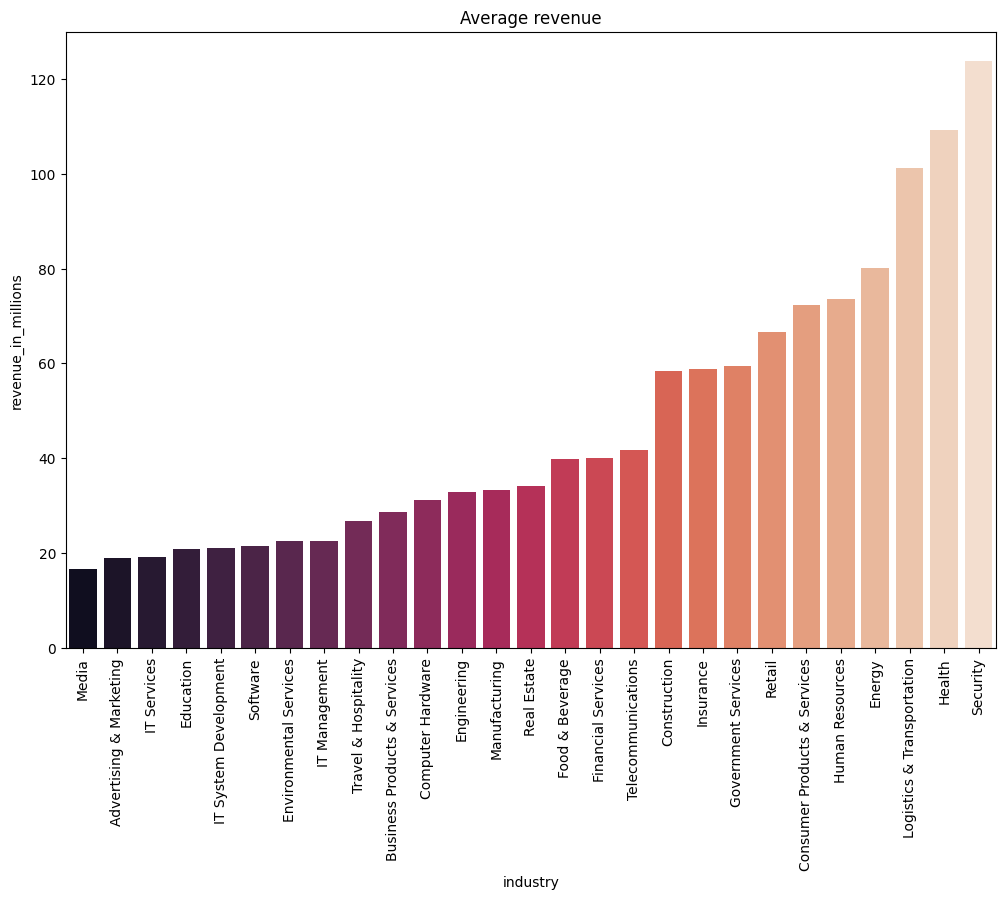

In [68]:
plt.figure(figsize=(12, 8))
sns.barplot(x=industry_revenue.index, y=industry_revenue.values, palette="rocket")
plt.xticks(rotation=90)
plt.xlabel("industry")
plt.ylabel("revenue_in_millions")
plt.title("Average revenue")
plt.show()

 **In this graph we see that the highest revenue industry is "Security industry".**

# **Which industries are most and least represented in the list?**

In [69]:
industry_counts = df['industry'].value_counts()
industry_counts

Business Products & Services    492
Advertising & Marketing         489
Software                        461
Health                          356
Construction                    350
Consumer Products & Services    314
IT Management                   276
Financial Services              239
Government Services             236
Real Estate                     198
Logistics & Transportation      186
Manufacturing                   181
Retail                          163
Human Resources                 157
Food & Beverage                 127
IT System Development           120
Engineering                      81
Telecommunications               79
Energy                           78
Insurance                        70
Education                        70
Security                         67
Travel & Hospitality             57
Media                            46
Environmental Services           43
IT Services                      43
Computer Hardware                32
Name: industry, dtype: int64

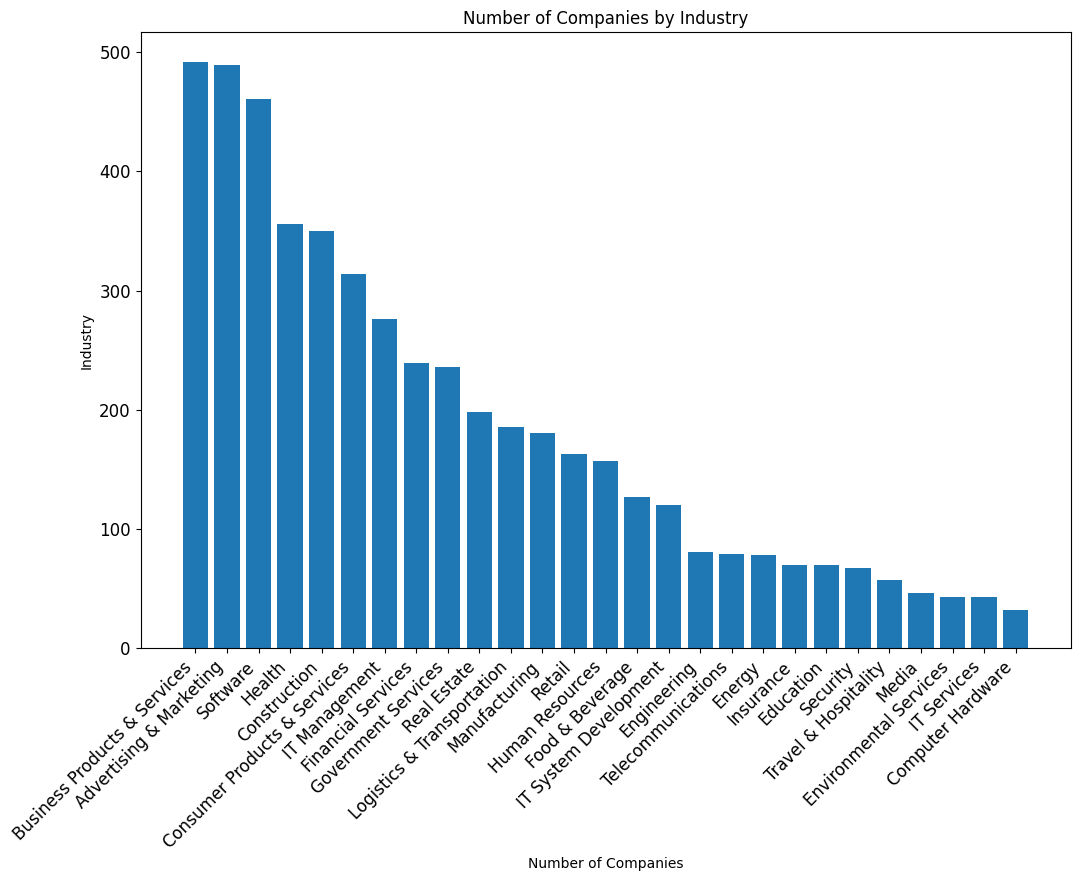

In [81]:
plt.figure(figsize=(12, 8))
plt.bar(industry_counts.index, industry_counts.values)
plt.title('Number of Companies by Industry')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**The most represented industries on the list:**

Business Products & Services Advertising & Marketing Software Each of these industries has over 400 companies listed.

**On the other hand, the least represented industries on the list are:**

Environmental Services, IT Services ,Computer Hardware. Each of these industries has less than 40 companies listed.

# Do you notice any interesting geographic trends?


In [71]:
state_counts = df['state'].value_counts().head(10)
state_counts

CA    712
TX    467
FL    384
NY    300
VA    288
IL    241
GA    219
PA    172
OH    160
CO    156
Name: state, dtype: int64

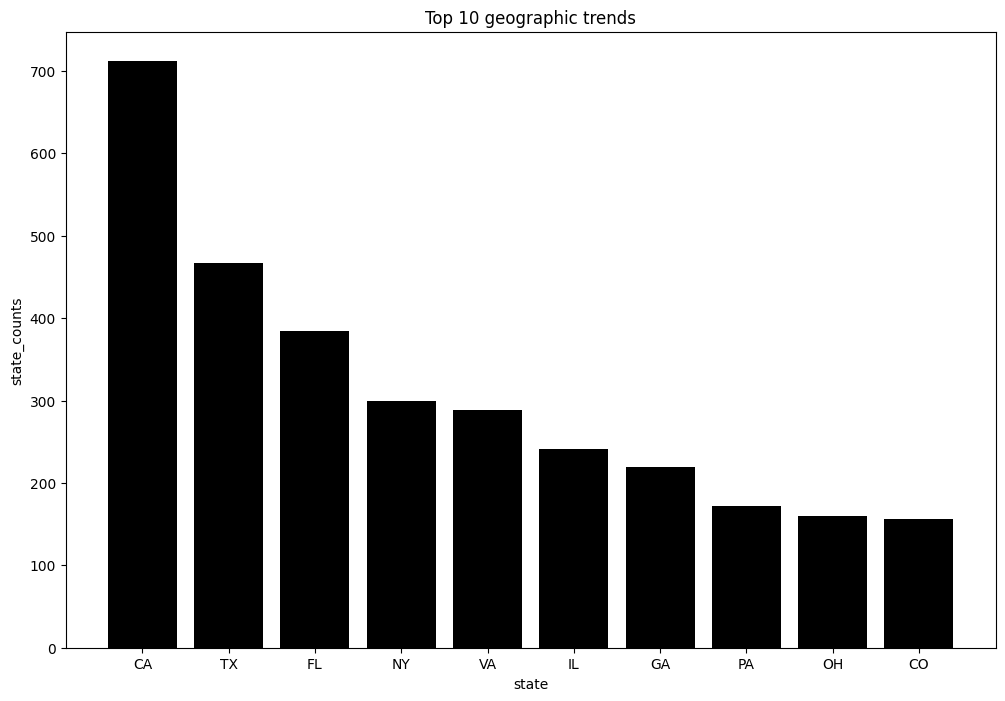

In [72]:
plt.figure(figsize=(12,8))
plt.bar(state_counts.index, state_counts.values, color='black')
plt.xlabel("state")
plt.ylabel("state_counts")
plt.title("Top 10 geographic trends")
plt.show()

## The top 5 states with the highest number of companies in the dataset are
California (712), Texas (467), Florida (384), New York (300), and Virginia (288).

# Which industries saw the largest average growth rate?

In [82]:
industry_growth = df.groupby('industry')['growth_%'].mean().sort_values(ascending=False)
top_industries = industry_growth.head(10)
print(top_industries)

industry
Logistics & Transportation      717.563346
Consumer Products & Services    687.534860
Food & Beverage                 668.225534
Computer Hardware               651.975244
Energy                          592.075591
Retail                          584.823802
Health                          546.911881
Software                        524.673761
Telecommunications              515.411890
Security                        490.193593
Name: growth_%, dtype: float64


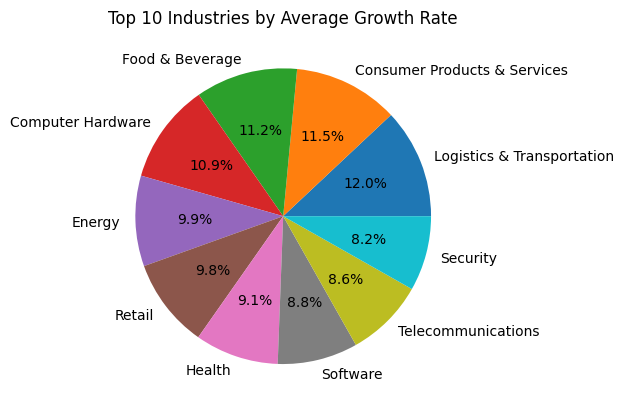

In [83]:
import matplotlib.pyplot as plt

# Create the pie chart
plt.pie(top_industries.values, labels=top_industries.index, autopct='%1.1f%%')

# Add a title
plt.title("Top 10 Industries by Average Growth Rate")

# Show the chart
plt.show()



# Which companies had the largest increase in staff/new hires?

In [85]:
df['new_hires'] = df['workers'] - df['previous_workers']


In [86]:
largest_new_hires = df.sort_values(by='new_hires', ascending=False).head(10)[['name', 'industry', 'new_hires']]


In [87]:
print(largest_new_hires)


                         name                      industry  new_hires
rank                                                                  
1617         Allied Universal                      Security   118531.0
3743                  Alorica  Business Products & Services    43000.0
3394              Infiniti HR               Human Resources    37145.0
1333               CircusTrix       Advertising & Marketing    13739.0
3164            ScribeAmerica                        Health    11641.0
1115                   TaskUs  Business Products & Services     9198.0
4101  Freddy's Frozen Custard               Food & Beverage     6494.0
427      Pathway Vet Alliance                        Health     4174.0
2919         Four Foods Group               Food & Beverage     3500.0
4974  Pacific Dental Services                        Health     3356.0


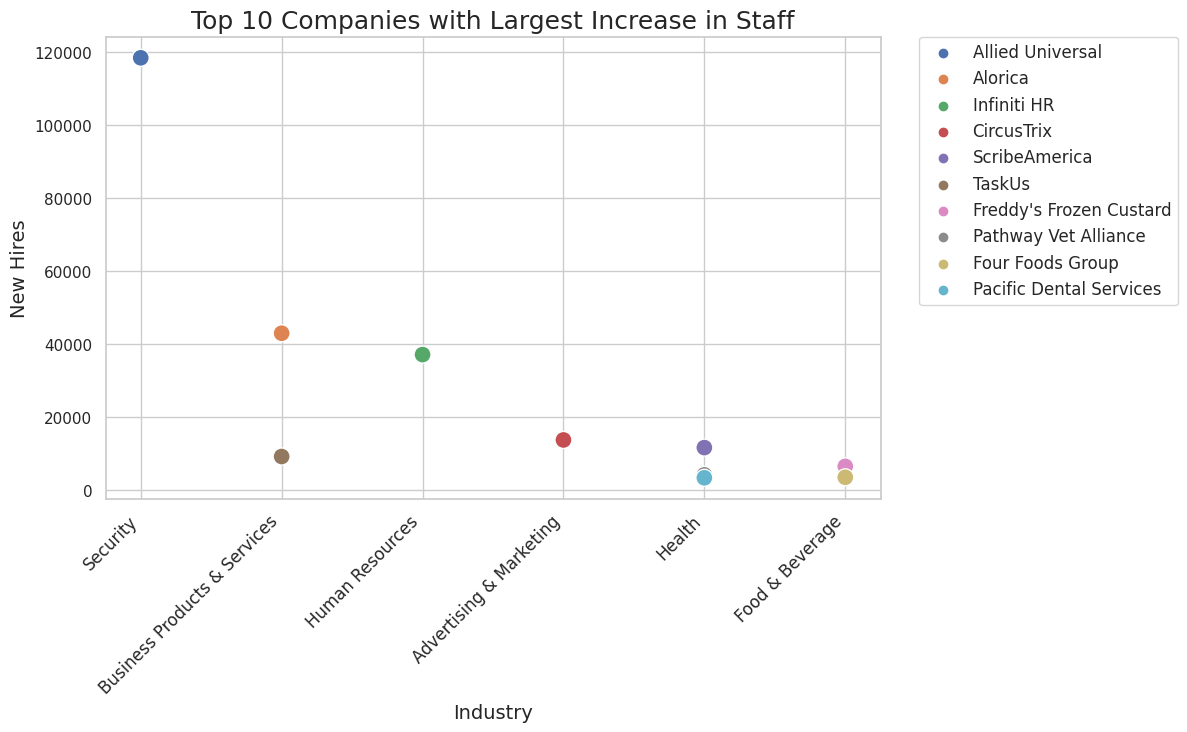

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=largest_new_hires, x='industry', y='new_hires', hue='name', s=150, ax=ax)
ax.set_xlabel('Industry', fontsize=14)
ax.set_ylabel('New Hires', fontsize=14)
ax.set_title('Top 10 Companies with Largest Increase in Staff', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=12)
plt.show()


The Allied Universal had the largest increase in staff/new hires among all 
the companies in the dataset with 118531 new hires.

The Security industry seems to have the highest new hires on average, with two Security companies appearing in the top 10 list.

In [92]:
df['worker_difference'] = df['workers'] - df['previous_workers']
df['revenue_difference'] = df['revenue_in_millions'] - df['revenue_in_millions'].shift(1)
revenue_and_staff = df[(df['worker_difference'] < 0) & (df['revenue_difference'] > 0)][['name', 'industry', 'revenue_difference', 'worker_difference']]
print(revenue_and_staff)


                                       name                      industry  \
rank                                                                        
361                               AdFicient       Advertising & Marketing   
525                       Quantico Tactical           Government Services   
1073                     Prime Therapeutics                        Health   
1156                            WealthForge            Financial Services   
1160                       Catalyst Outdoor       Advertising & Marketing   
1598                                 Taulia                      Software   
1667                         IT Authorities                 IT Management   
1728                                 Zentra                        Retail   
1737                     Worth Clark Realty                   Real Estate   
1829                         Perfect Snacks               Food & Beverage   
1970               Synapse Business Systems                 IT Management   

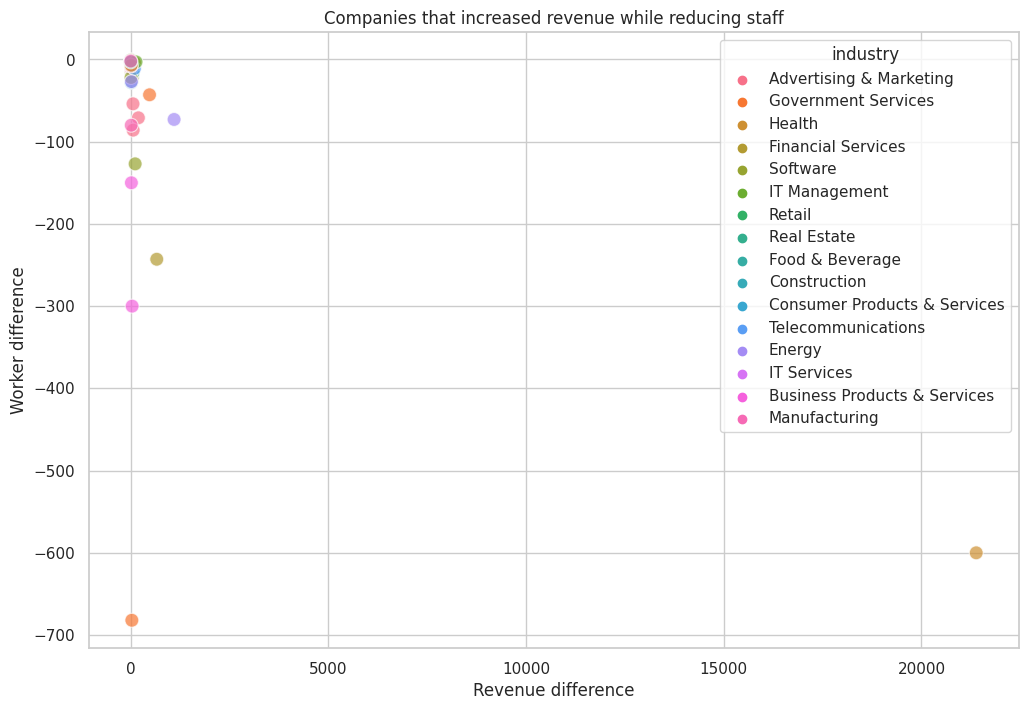

In [96]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=revenue_and_staff, x='revenue_difference', y='worker_difference', hue='industry', s=100, alpha=0.7)

plt.title('Companies that increased revenue while reducing staff')
plt.xlabel('Revenue difference')
plt.ylabel('Worker difference')

plt.show()





The best graph for this code would be a scatter plot, where revenue_difference can be plotted on the x-axis and worker_difference can be plotted on the y-axis. Each data point can be represented by a marker with color or shape indicating the industry type. This way we can see the relationship between revenue and staff changes for different industries.

# **Conclusion**
Based on the exploratory data analysis (EDA) performed on the companies dataset, the following conclusions can be drawn:




In summary, the companies dataset contains valuable information on the financial performance of over 5000 companies across various industries. It reveals that the average revenue for companies in the dataset is substantial, indicating the presence of large and successful companies. Additionally, the technology industry has a dominant presence in the dataset, reflecting the rapid growth and importance of the technology sector in the economy. The dataset also highlights a positive correlation between revenue and the number of workers, but with significant variations in the number of workers required to generate revenue across different companies. Furthermore, the dataset uncovers some rare cases where companies were able to increase revenue while reducing staff, indicating the possibility of operational efficiency in such cases. Lastly, the dataset provides useful insights into the revenue growth rates of different companies, indicating a diverse range of growth rates from highly successful to negative. Overall, the dataset offers an excellent opportunity for further investigation into the factors that drive a company's success or failure.